# Ejercicios con la estructura DataFrame

Importar las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Creación de un DataFrame

In [2]:
tabla = pd.DataFrame([('Enero', 31, 'inv', 2, 4),('Febrero', 28, 'inv', 3, 2),('Marzo', 31, 'inv', 7, 5),
                  ('Abril', 30, 'pri', 7, 9),('Mayo', 31, 'pri', 9, 10),('Junio', 30, 'pri', 15, 14),
                  ('Julio', 31, 'ver', 20, 24),('Agosto', 31, 'ver', 27, 26),('Septiembre', 30, 'ver', 25, 18),
                  ('Octubre', 31, 'oto', 20, 14),('Noviembre', 30, 'oto', 11, 10),('Diciembre', 31, 'oto', 6, 7),], 
                columns=['Mes', 'Días', 'Estación', 'Temp.2021', 'Temp.2022'],   
                index=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
tabla

,Mes,Días,Estación,Temp.2021,Temp.2022
Ene,Enero,31,inv,2,4
Feb,Febrero,28,inv,3,2
Mar,Marzo,31,inv,7,5
Abr,Abril,30,pri,7,9
May,Mayo,31,pri,9,10
Jun,Junio,30,pri,15,14
Jul,Julio,31,ver,20,24
Ago,Agosto,31,ver,27,26
Sep,Septiembre,30,ver,25,18
Oct,Octubre,31,oto,20,14


#### Ejercicio 1. Muestra los valores contenidos en la tabla, las etiquetas de sus índices, y los nombres de sus columnas


In [3]:
tabla.values

array([['Enero', 31, 'inv', 2, 4],
       ['Febrero', 28, 'inv', 3, 2],
       ['Marzo', 31, 'inv', 7, 5],
       ['Abril', 30, 'pri', 7, 9],
       ['Mayo', 31, 'pri', 9, 10],
       ['Junio', 30, 'pri', 15, 14],
       ['Julio', 31, 'ver', 20, 24],
       ['Agosto', 31, 'ver', 27, 26],
       ['Septiembre', 30, 'ver', 25, 18],
       ['Octubre', 31, 'oto', 20, 14],
       ['Noviembre', 30, 'oto', 11, 10],
       ['Diciembre', 31, 'oto', 6, 7]], dtype=object)

In [4]:
tabla.index

Index(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct',
       'Nov', 'Dic'],
      dtype='object')

In [5]:
tabla.columns

Index(['Mes', 'Días', 'Estación', 'Temp.2021', 'Temp.2022'], dtype='object')

#### Ejercicio 2. Muestra los datos de la columna Mes con dos comandos diferentes. 

In [6]:
tabla.Mes

Ene         Enero
Feb       Febrero
Mar         Marzo
Abr         Abril
May          Mayo
Jun         Junio
Jul         Julio
Ago        Agosto
Sep    Septiembre
Oct       Octubre
Nov     Noviembre
Dic     Diciembre
Name: Mes, dtype: object

In [7]:
tabla['Mes']

Ene         Enero
Feb       Febrero
Mar         Marzo
Abr         Abril
May          Mayo
Jun         Junio
Jul         Julio
Ago        Agosto
Sep    Septiembre
Oct       Octubre
Nov     Noviembre
Dic     Diciembre
Name: Mes, dtype: object

#### Ejercicio 3. Aplica el filtro 1 y 2 de forma apropiada para obtener la información de los meses de otoño con más de 10 grados en 2021, y para obtener la información de los meses de otoño y los meses con más de 10 grados en 2021.

In [8]:
filtro1 = tabla['Estación'] == 'oto'
filtro2 = tabla['Temp.2021'] > 10

In [9]:
#AND
tabla[filtro1 & filtro2]

,Mes,Días,Estación,Temp.2021,Temp.2022
Oct,Octubre,31,oto,20,14
Nov,Noviembre,30,oto,11,10


In [10]:
#OR
tabla[filtro1|filtro2]

,Mes,Días,Estación,Temp.2021,Temp.2022
Jun,Junio,30,pri,15,14
Jul,Julio,31,ver,20,24
Ago,Agosto,31,ver,27,26
Sep,Septiembre,30,ver,25,18
Oct,Octubre,31,oto,20,14
Nov,Noviembre,30,oto,11,10
Dic,Diciembre,31,oto,6,7


Generación y representación de una serie con las temperaturas de 2021 y 2022

In [11]:
temp = pd.concat([tabla['Temp.2021'], tabla['Temp.2022']], axis=0)
temp = temp.apply(lambda val: float(val))
temp

Ene     2.0
Feb     3.0
Mar     7.0
Abr     7.0
May     9.0
Jun    15.0
Jul    20.0
Ago    27.0
Sep    25.0
Oct    20.0
Nov    11.0
Dic     6.0
Ene     4.0
Feb     2.0
Mar     5.0
Abr     9.0
May    10.0
Jun    14.0
Jul    24.0
Ago    26.0
Sep    18.0
Oct    14.0
Nov    10.0
Dic     7.0
dtype: float64

<AxesSubplot: title={'center': 'temperaturas'}>

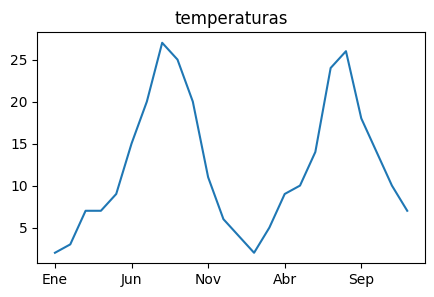

In [12]:
figura, ax = plt.subplots(1,1, figsize=(5,3))
temp.plot(ax = ax, title = 'temperaturas')

Definición y aplicación de un filtro de media y otro de diferencias y representación de los resultados

#### Ejercicio 4. Completa las líneas de código donde se indica

In [13]:
def filtro_media(serie):
    valores=serie.values
    new_valores = valores.copy()
    for i in range(len(valores)):
        if i<3 or i>len(valores)-4:
            new_valores[i]=np.nan
        else:
            # Añade una línea de código para calcular la media con los valores vecinos
            #cada valor lo sustituimos por la media de ese valor con sus vecinos (3 anteriores y 3 siguientes)
            new_valores[i]= (valores[i-3]+valores[i-2]+valores[i]+valores[i-1]+valores[i+3]+valores[i+2]+valores[i+1])/7
               
    new_serie=pd.Series(new_valores, index=serie.index)
    return new_serie

def filtro_diferencia(serie):
    valores=serie.values
    new_valores = valores.copy()
    for i in range(len(valores)):
        if i<1:
            new_valores[i]=np.nan
        else:
            # Añade una línea de código para calcular la diferencia de cada valor con el anterior
            #para cada valor calculo la diferencia con el anterior
            new_valores[i]=valores[i]-valores[i-1]
    new_serie=pd.Series(new_valores, index=serie.index)
    return new_serie

In [14]:
tendencia = filtro_media(temp)
cambios = filtro_diferencia(temp)

<AxesSubplot: title={'center': 'cambios de temperaturas'}>

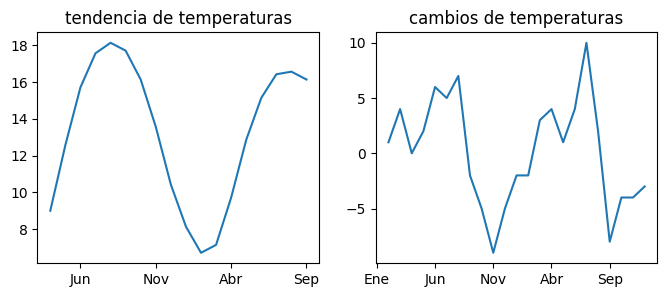

In [15]:
#Cuantos más vecinos utilice para suavizar la media más se suavizará la gráfica
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
tendencia.plot(ax = ax1, title='tendencia de temperaturas')
cambios.plot(ax = ax2, title='cambios de temperaturas')

#### Ejercicio 5. Normaliza la serie temp. Estandariza sus valores (con métodos de scikit-learn y usando la fórmula. Escala los valores de tem de 0 a 1 (con métodos de scikit-learn y usando la fórmula).

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp_float = temp.astype(float)
scaler.fit_transform(temp_float.values.reshape(-1,1))

array([[-1.32636688],
       [-1.19748913],
       [-0.68197811],
       [-0.68197811],
       [-0.42422261],
       [ 0.34904392],
       [ 0.99343269],
       [ 1.89557697],
       [ 1.63782146],
       [ 0.99343269],
       [-0.1664671 ],
       [-0.81085587],
       [-1.06861138],
       [-1.32636688],
       [-0.93973362],
       [-0.42422261],
       [-0.29534485],
       [ 0.22016616],
       [ 1.5089437 ],
       [ 1.76669921],
       [ 0.73567718],
       [ 0.22016616],
       [-0.29534485],
       [-0.68197811]])

In [17]:
std_temp = (temp-np.mean(temp))/np.std(temp)
std_temp

Ene   -1.326367
Feb   -1.197489
Mar   -0.681978
Abr   -0.681978
May   -0.424223
Jun    0.349044
Jul    0.993433
Ago    1.895577
Sep    1.637821
Oct    0.993433
Nov   -0.166467
Dic   -0.810856
Ene   -1.068611
Feb   -1.326367
Mar   -0.939734
Abr   -0.424223
May   -0.295345
Jun    0.220166
Jul    1.508944
Ago    1.766699
Sep    0.735677
Oct    0.220166
Nov   -0.295345
Dic   -0.681978
dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp_float = temp.astype(float)
scaler.fit_transform(temp_float.values.reshape(-1,1))

array([[0.  ],
       [0.04],
       [0.2 ],
       [0.2 ],
       [0.28],
       [0.52],
       [0.72],
       [1.  ],
       [0.92],
       [0.72],
       [0.36],
       [0.16],
       [0.08],
       [0.  ],
       [0.12],
       [0.28],
       [0.32],
       [0.48],
       [0.88],
       [0.96],
       [0.64],
       [0.48],
       [0.32],
       [0.2 ]])

In [19]:
temp_norm = (temp-np.min(temp))/(np.max(temp)-np.min(temp))
temp_norm

Ene    0.00
Feb    0.04
Mar    0.20
Abr    0.20
May    0.28
Jun    0.52
Jul    0.72
Ago    1.00
Sep    0.92
Oct    0.72
Nov    0.36
Dic    0.16
Ene    0.08
Feb    0.00
Mar    0.12
Abr    0.28
May    0.32
Jun    0.48
Jul    0.88
Ago    0.96
Sep    0.64
Oct    0.48
Nov    0.32
Dic    0.20
dtype: float64

#### Ejercicio 6. Calcular la temperatura media en cada estación en 2022

In [29]:
tabla.groupby(['Estación'])['Temp.2022'].mean()

Estación
inv     3.666667
oto    10.333333
pri    11.000000
ver    22.666667
Name: Temp.2022, dtype: float64